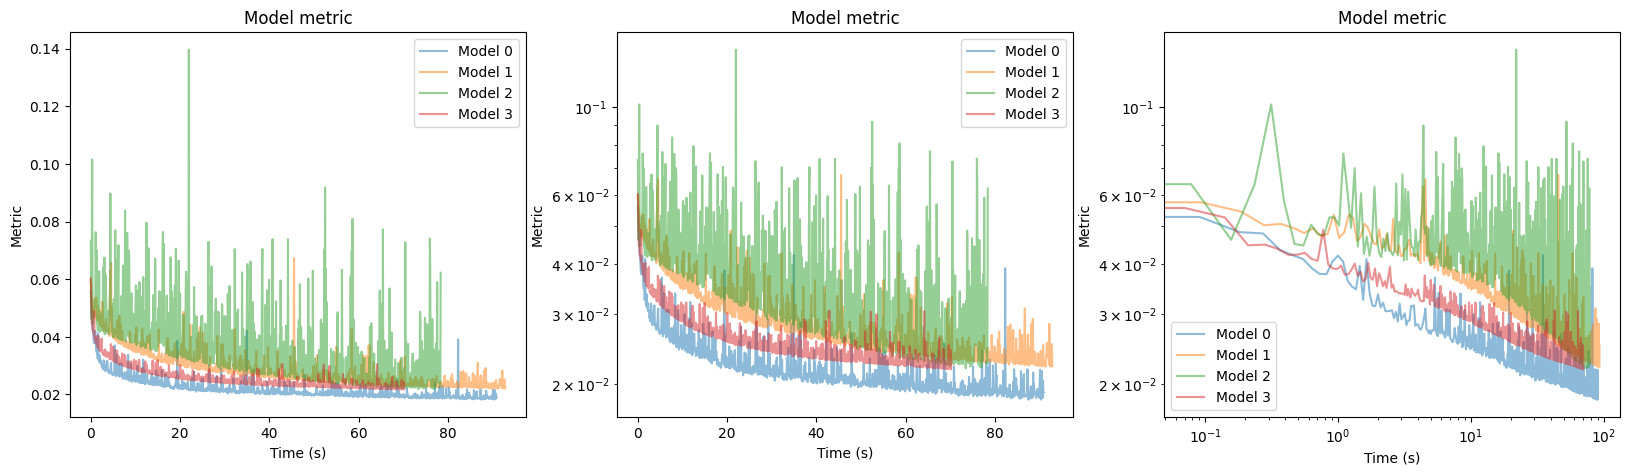

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

source = "data/model_comparison/Dust_Map---Mass.txt"

with open(source) as f:
    archives = f.readlines()

models = []
def print_model_summary(id):
    print(models[id]['summary'])

for model_number, archive in enumerate(archives):
    archive = archive.strip()

    data = np.load(f'{archive}/results.npz')
    training_time = data['training_time']
    score = data['score']

    with open(f'{archive}/history', "rb") as file_pi:
        history = pickle.load(file_pi)
    
    with open(f'{archive}/model_summary.txt', "r") as file:
        summary = file.read()
    
    for line in summary.split('\n'):
        if line.startswith('Metrics: '):
            metrics = eval(line.removeprefix('Metrics: '))
        if line.startswith('Loss: '):
            loss = eval(line.removeprefix('Loss: '))
        if line.startswith('Epochs: '):
            epochs = int(line.removeprefix('Epochs: '))
        if line.startswith('Optimizer: '):
            optimizer = line.removeprefix('Optimizer: ')

    time_range = np.linspace(0, training_time, epochs, endpoint=True)

    models.append({
        "summary": summary,
    })

    for i, metric in enumerate(metrics):
        # plt.plot(time_range, history[metric], alpha=0.5, label=f'({i}) Train {metric}')
        axs[0].plot(time_range, history["val_" + metric], alpha=0.5, label=f'Model {model_number}')
        axs[1].plot(time_range, history["val_" + metric], alpha=0.5, label=f'Model {model_number}')
        axs[2].plot(time_range, history["val_" + metric], alpha=0.5, label=f'Model {model_number}')

for ax in axs:
    ax.set_title(f'Model metric')
    ax.set_ylabel('Metric')
    ax.set_xlabel('Time (s)')
    ax.legend()

axs[1].set_yscale('log')
axs[2].set_xscale('log')
axs[2].set_yscale('log')

plt.show()



In [26]:
print_model_summary(0)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dust Map (InputLayer)       [(None, 64, 64, 1)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               524416    
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 524,545
Trainable params: 524,545
Non-trainable params: 0
_________________________________________________________________
Loss: ['mean_squared_error']
Optimizer: SGD
Metrics: ['mean_absolute_error']
Valid frac: 0.2
Test frac: 0.1
Epochs: 1000
Batch size: 50
Training time: 90.94s
Score: [0.00061264215037226